# Regression - Bike Shop Data

Predict how many bike rentals happen for a day (cnt). Please use the following data and respond to the questions below.

This project requires Python 3.7 or above: and Scikit Learn

In [275]:
import sys
assert sys.version_info >= (3, 7)
import sklearn
assert sklearn.__version__ >= "1.0.1"
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [262]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# EDA

In [263]:
# Read data set
df = pd.read_csv("https://raw.githubusercontent.com/Ph1lippK/VAWI/master/Data/02_Bike%20rental.csv",sep=',')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


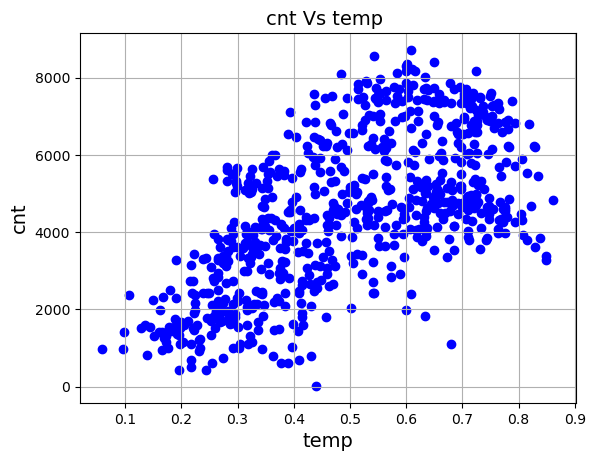

In [329]:
plt.scatter(df['temp'], df['cnt'], color='blue')
plt.title('cnt Vs temp ', fontsize=14)
plt.xlabel('temp', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

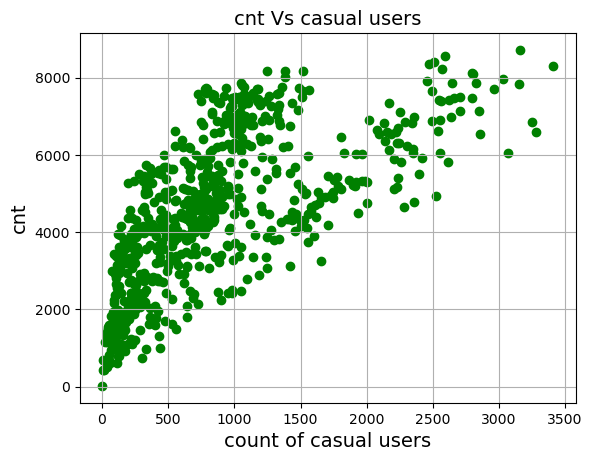

In [265]:
plt.scatter(df['casual'], df['cnt'], color='green')
plt.title('cnt Vs casual users', fontsize=14)
plt.xlabel('count of casual users', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

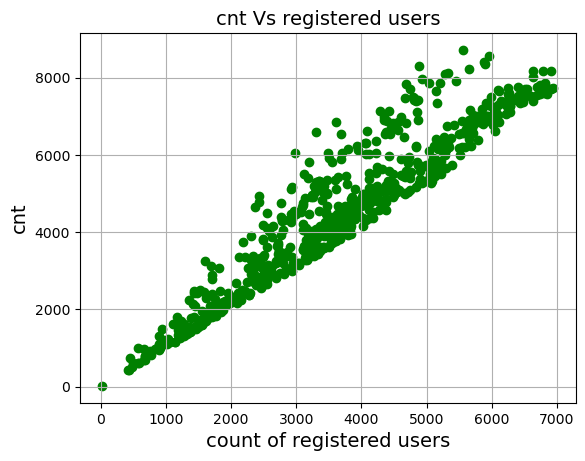

In [266]:
plt.scatter(df['registered'], df['cnt'], color='green')
plt.title('cnt Vs registered users', fontsize=14)
plt.xlabel('count of registered users', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

# Linear Regression with temperature

In [323]:
#X = df[['temp','casual','registered']]#.array.reshape(-1, 1)
X = df['temp'].array.reshape(-1, 1)
y = df['cnt']

# Split datasets


In [324]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train ML Model

In [325]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
 
# Create linear regression model
lin_reg = LinearRegression()
 
# Fit the linear regression model
lin_reg.fit(X_train, y_train)

LinearRegression()

# Evaluate ML Model

In [326]:
predictions_train = lin_reg.predict(X_train)
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_train,predictions_train))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_train, predictions_train))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_train, predictions_train)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_train, predictions_train))

Mean Absolute Error(MAE): 1236.581387433389
Mean Squared Error(MSE): 2243029.4768304983
Root Mean Squared Error(RMSE): 1497.6746899211785
R2-Square: 0.3881036285282803


In [327]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([ 1214.64211903, 14496.06211613])

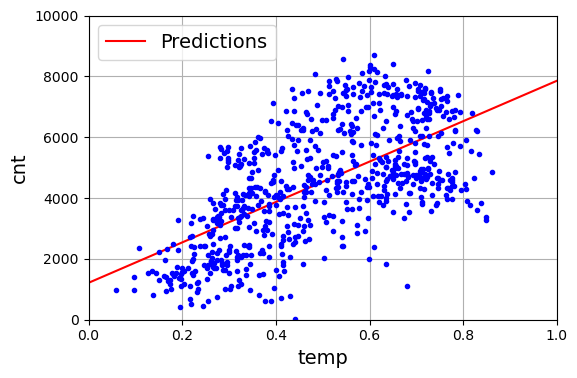

In [328]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("temp")
plt.ylabel("cnt")
#plt.axis([0, 2, 0, 15]) [xmin, xmax, ymin, ymax]'
plt.axis([0,1,0,10000])
plt.grid()
plt.legend(loc="upper left")
save_fig("mobile_app_data_example_1_predictions")

plt.show()

# Multiple Linear Regression

In [315]:
x = df[['temp','casual','registered']]
y = df['cnt']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -4.547473508864641e-12
Coefficients: 
 [6.94804144e-12 1.00000000e+00 1.00000000e+00]
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.118e+32
Date:                Sat, 28 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:16:39   Log-Likelihood:                 18770.
No. Observations:                 731   AIC:                        -3.753e+04
Df Residuals:                     727   BIC:                        -3.751e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------